In [80]:
from tkinter import *
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from flask import Flask,request,render_template
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [72]:
!pip install seaborn

In [29]:
training = pd.read_csv("training.csv")
symp_tr = training.drop(['prognosis'],axis = 1)
dis_tr = training['prognosis']
testing = pd.read_csv("testing.csv")
symp_te = testing.drop(['prognosis'],axis = 1)
dis_te = testing['prognosis']


In [30]:
dis_tr.replace({'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
'Migraine':11,'Cervical spondylosis':12,
'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
'(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
'Impetigo':40},inplace=True)
dis_te.replace({'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
'Migraine':11,'Cervical spondylosis':12,
'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
'(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
'Impetigo':40},inplace=True)


In [54]:
x_train = np.array(symp_tr)
y_train = np.array(dis_tr)
np.ravel(y_train)

x_test = np.array(symp_te)
y_test = np.array(dis_te)
np.ravel(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40], dtype=int64)

<AxesSubplot:>

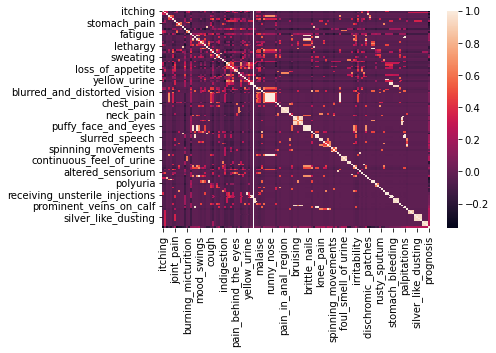

In [75]:
corr = training.corr()
sns.heatmap(corr)

<Figure size 2880x2880 with 0 Axes>

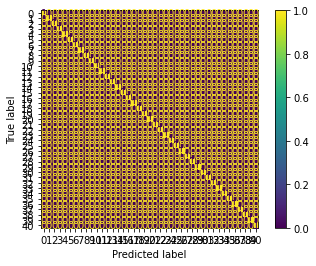

In [84]:
gnb = GaussianNB()
naive_bayes = gnb.fit(x_train, y_train)
plt.figure(figsize=(40, 40))
plot_confusion_matrix(naive_bayes, x_test, y_test)
plt.show()

In [63]:
pickle.dump(naive_bayes, open('Naive_bayes.pkl', 'wb'))

In [81]:
pred = naive_bayes.predict(x_test)
actual = y_test
plot_confusion_matrix(actual, pred)
plt.show()

TypeError: plot_confusion_matrix() missing 1 required positional argument: 'y_true'